<a href="https://colab.research.google.com/github/Dansah2/Udacity_Tutorials/blob/main/Udacity_Tensorflow_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import, division, print_function
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


print(tf.__version__)

2.12.0


In [ ]:
dataset_path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names =["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Orgin"]


In [ ]:
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.tail(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Orgin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Orgin           0
dtype: int64

In [ ]:
dataset = dataset.dropna().reset_index(drop=True).copy()

In [ ]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Orgin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
dataset.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Orgin             int64
dtype: object

In [ ]:
dataset['Orgin']

0      1
1      1
2      1
3      1
4      1
      ..
387    1
388    2
389    1
390    1
391    1
Name: Orgin, Length: 392, dtype: int64

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset.shape


(314, 8)

In [ ]:
test_dataset.shape

(78, 8)

In [ ]:
dataset.shape

(392, 8)

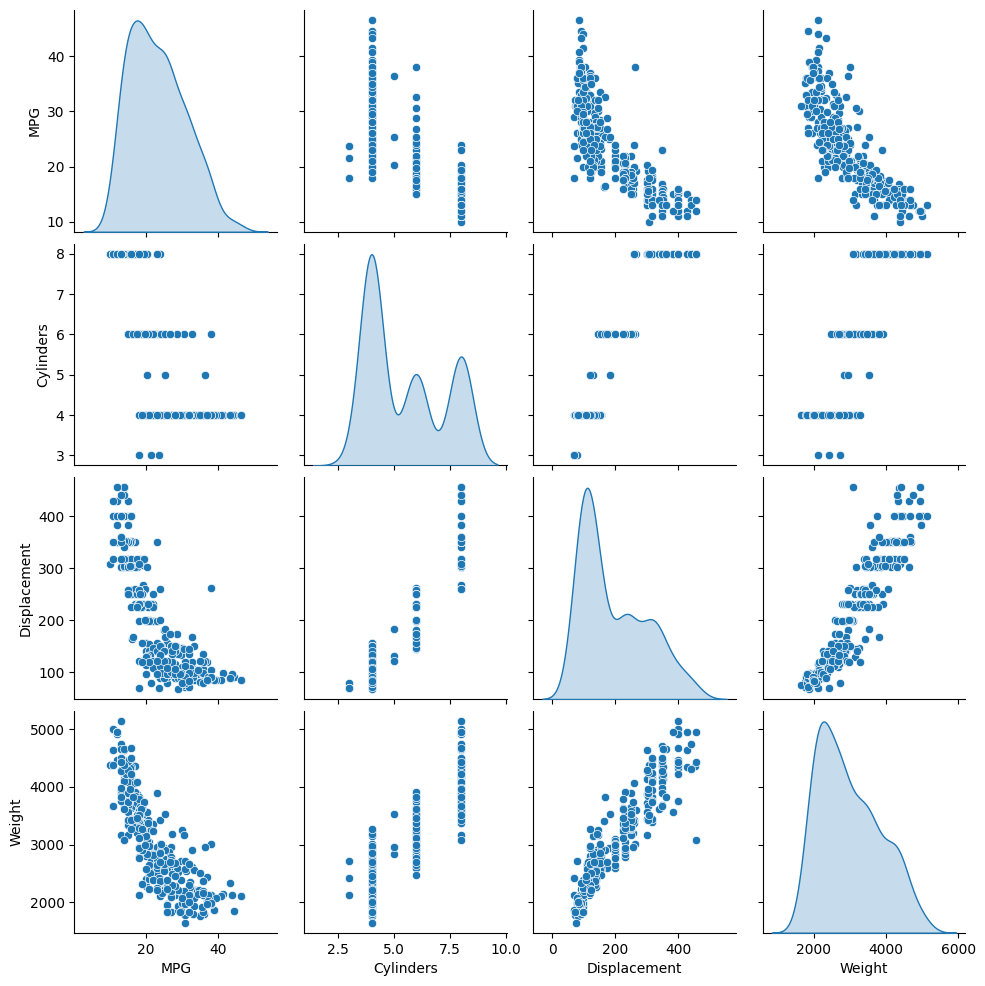

In [ ]:
# plot the training data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Orgin,314.0,1.573248,0.800988,1.0,1.00,1.0,2.00,3.0


In [ ]:
# split the labels from the features
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')


In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
      layers.Dense(64, activation=tf.nn.relu),
      layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

  return model

model = build_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# try the model before training just to make sure there are no errors
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 352ms/step


array([[ 0.19895718],
       [ 0.03439289],
       [-0.31720722],
       [-0.02527715],
       [ 0.07377684],
       [-0.0849061 ],
       [ 0.09549627],
       [ 0.04949012],
       [-0.1240796 ],
       [ 0.11387515]], dtype=float32)

In [ ]:
from keras.api._v2.keras import callbacks
# Display traing progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.726000,1.056248,2.726000,9.588247,2.369225,9.588247,995
996,2.694268,1.019045,2.694268,8.711839,2.210009,8.711839,996
997,2.732462,1.039114,2.732462,8.869118,2.274107,8.869118,997
998,2.556061,0.990194,2.556061,8.579296,2.234013,8.579296,998
999,2.588881,1.014415,2.588881,9.155890,2.329486,9.155890,999


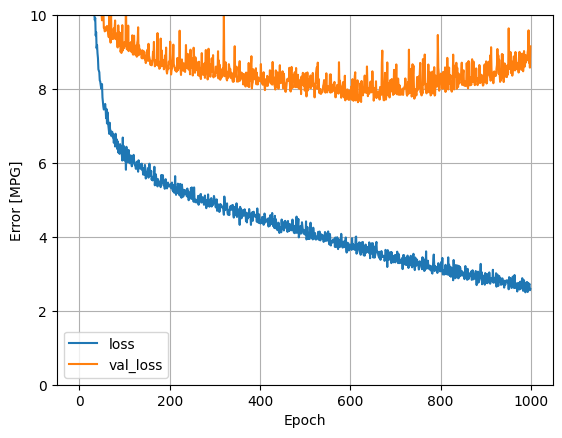

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


....................................................................................................
......

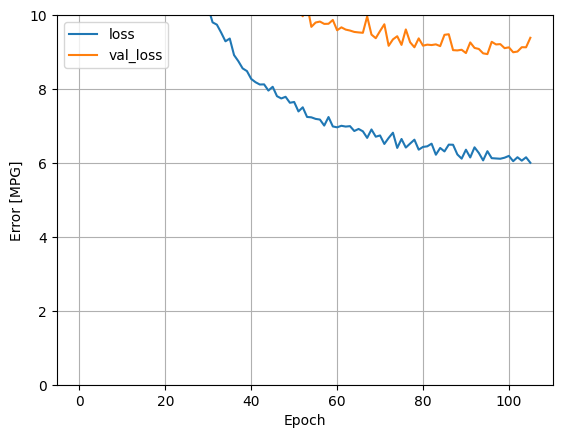

In [ ]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
plot_loss(history)

In [ ]:
# check on how the model is generalizing
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print(f"Testing set Mean Abs Error: {mae} MPG")

Testing set Mean Abs Error: 2.1871039867401123 MPG


3/3 [==============================] - 0s 4ms/step


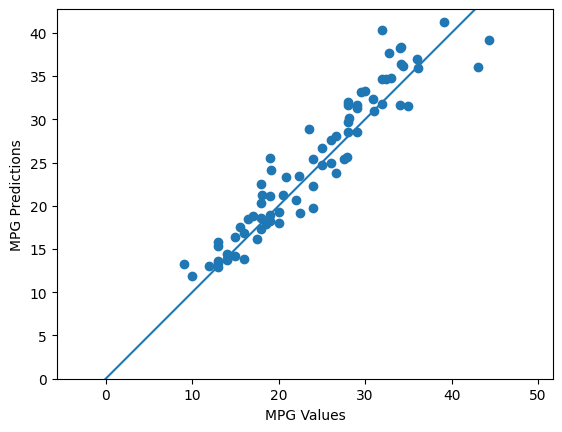

In [ ]:
# make predictions
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('MPG Values')
plt.ylabel("MPG Predictions")
plt.axis('equal')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

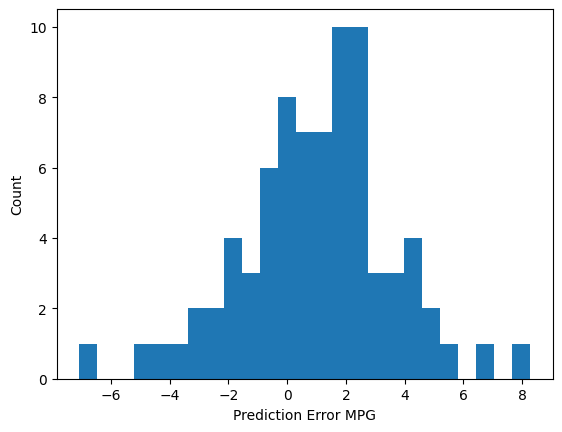

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error MPG')
_ = plt.ylabel("Count")